In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as c
import matplotlib.patches as mpatches

In [3]:
# Logistic Regression method
class LogisticRegression:
    def __init__(self, eta, lam, runs):
        self.eta = eta    # step parameter of gradient descent
        self.lam = lam    # regularization parameter
        self.runs = runs    # number of runs for gradient descent
        return None

    def fit(self, X, y, w_init = None):
        x = np.column_stack((np.ones(len(X)),X))    # adding a bias term to the input x's
        b = np.zeros((y.size, y.max()+1))
        b[np.arange(y.size),y] = 1    # turn y into one-hot form
        if w_init is not None:
            self.W = w_init
        else:
            self.W = np.random.rand(x.shape[1], 3)    # 3 sets of weights needed
        n = x.shape[0]    # number of data points
        w1 = self.W[:,0].reshape(-1,1)    # pick out each set of weights
        w2 = self.W[:,1].reshape(-1,1)
        w3 = self.W[:,2].reshape(-1,1)
        for _ in range(self.runs):
            grad_des_1 = np.zeros(len(self.W)).reshape(-1,1)    # initializing gradient descent vector
            grad_des_2 = np.zeros(len(self.W)).reshape(-1,1)
            grad_des_3 = np.zeros(len(self.W)).reshape(-1,1)
            deno = []    # list of denominators
            for i in range(n):
                denom = np.exp(np.dot(x[i],w1))[0]+np.exp(np.dot(x[i],w2))[0]+np.exp(np.dot(x[i],w3))[0]
                deno.append(denom)
            for i in range(n):    # gradient descent considers all data points
                denom = deno[i]
                y_hat_1 = np.exp(np.dot(x[i],w1))[0]/denom    # predicted response for type 0
                y_hat_2 = np.exp(np.dot(x[i],w2))[0]/denom
                y_hat_3 = np.exp(np.dot(x[i],w3))[0]/denom
                grad_des_1 = grad_des_1 + (y_hat_1-b[i,0])*x[i].reshape(-1,1)    # updating gradient descent for each data point
                grad_des_2 = grad_des_2 + (y_hat_2-b[i,1])*x[i].reshape(-1,1)
                grad_des_3 = grad_des_3 + (y_hat_3-b[i,2])*x[i].reshape(-1,1)
            w1 = w1 - self.eta*(grad_des_1 + 2*self.lam*w1)    # updating weights at the end of each descent step
            w2 = w2 - self.eta*(grad_des_2 + 2*self.lam*w2)
            w3 = w3 - self.eta*(grad_des_3 + 2*self.lam*w3)
        self.W = np.column_stack((w1,w2,w3))
        return

    def predict(self, X_pred):
        X_pred = np.column_stack((np.ones(len(X_pred)),X_pred))
        preds = []
        for i in range(len(X_pred)):
            x = X_pred[i]
            wx = np.dot(x,self.W)
            softmax1 = wx[0]
            softmax2 = wx[1]
            softmax3 = wx[2]
            if softmax1 == max(softmax1, softmax2, softmax3):    # pick out the type with the highest softmax value
                preds.append(0)
            elif softmax2 == max(softmax1, softmax2, softmax3):
                preds.append(1)
            else:
                preds.append(2)
        return np.array(preds)

In [4]:
# KNN method
class KNNModel:
    def __init__(self, k):
        self.X = None
        self.y = None
        self.K = k    # number of nearest neighbors

    def predict(self, X_pred):
        preds = []
        for i in range(len(X_pred)):
            mag = X_pred[i,0]
            temp = X_pred[i,1]
            dist = []
            for j in range(len(self.X)):
                mag_j = self.X[j,0]
                temp_j = self.X[j,1]
                new_dist = ((mag-mag_j)/3)**2 + (temp-temp_j)**2    # distance calculation
                dist.append(new_dist)
            dist = np.array(dist)
            mat = np.column_stack((self.y,dist))
            mat = mat[np.argsort(mat[:, 1])]    # sorting the response according to distance
            nearest = mat[0:self.K]    # pick out k nearest neighbors
            freq = np.asarray(np.unique(nearest[:,0],return_counts = True)).T
            freq = freq[np.argsort(freq[:,1])]
            pred = freq[0,0]    # pick out the majority type after counting
            preds.append(pred)
        preds = np.array(preds)
        return preds

    def fit(self, X, y):
        self.X = X
        self.y = y

In [5]:
# Visualize the decision boundary that a model produces
def visualize_boundary(model, X, y, title, width=2):
    # Create a grid of points
    x_min, x_max = min(X[:, 0] - width), max(X[:, 0] + width)
    y_min, y_max = min(X[:, 1] - width), max(X[:, 1] + width)
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, 0.05),
        np.arange(y_min, y_max, 0.05)
    )

    # Flatten the grid so the values match spec for self.predict
    xx_flat = xx.flatten()
    yy_flat = yy.flatten()
    X_pred = np.vstack((xx_flat, yy_flat)).T

    # Get the class predictions
    Y_hat = model.predict(X_pred)
    Y_hat = Y_hat.reshape((xx.shape[0], xx.shape[1]))

    # Visualize them.
    cmap = c.ListedColormap(['r', 'b', 'g'])
    plt.figure()
    plt.title(title)
    plt.xlabel('Magnitude')
    plt.ylabel('Temperature')
    plt.pcolormesh(xx, yy, Y_hat, cmap=cmap, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, linewidths=1,
                edgecolors='black')

    # Adding a legend and a title
    red = mpatches.Patch(color='red', label='Dwarf')
    blue = mpatches.Patch(color='blue', label='Giant')
    green = mpatches.Patch(color='green', label='Supergiant')
    plt.legend(handles=[red, blue, green])

    # Saving the image to a file, and showing it as well
    plt.savefig(title + '.png')
    if show_charts:
        plt.show()

C:\Users\Tayler99\AppData\Local\Temp/ipykernel_99976/3413682278.py:26: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Y_hat, cmap=cmap, alpha=0.3)


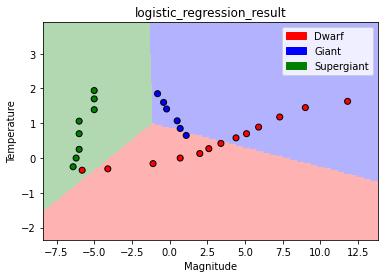

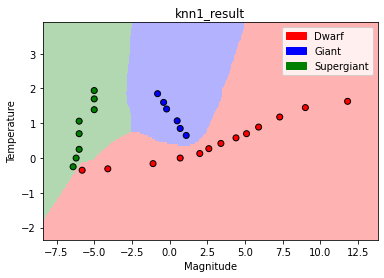

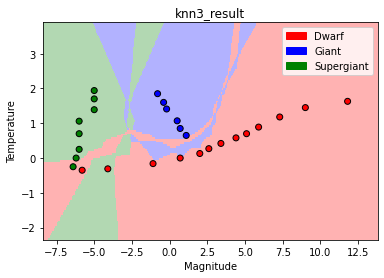

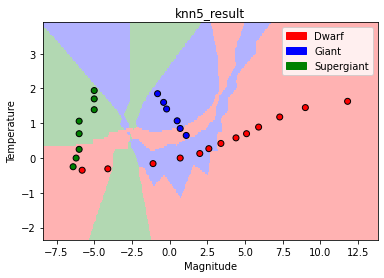

In [8]:
star_labels = {
    'Dwarf': 0,       # also corresponds to 'red' in the graphs
    'Giant': 1,       # also corresponds to 'blue' in the graphs
    'Supergiant': 2   # also corresponds to 'green' in the graphs
}

df = pd.read_csv('hr.csv')
X = df[['Magnitude', 'Temperature']].values
y = np.array([star_labels[x] for x in df['Type']])

eta = 0.1 # Learning rate
lam = 0.1 # Lambda for regularization
runs = 10000
show_charts = True
    
# Compare the decision boundary produced by different models
lr = LogisticRegression(eta=eta, lam=lam, runs = runs)
lr.fit(X, y)
visualize_boundary(lr, X, y, 'logistic_regression_result')
    
knn1 = KNNModel(k=1)
knn1.fit(X, y)
visualize_boundary(knn1, X, y, 'knn1_result')

knn3 = KNNModel(k=3)
knn3.fit(X, y)
visualize_boundary(knn3, X, y, 'knn3_result')

knn5 = KNNModel(k=5)
knn5.fit(X, y)
visualize_boundary(knn5, X, y, 'knn5_result')